In [1]:
import tensorflow as tf 
import numpy as np 
import sys
from pathlib import Path
from os.path import dirname, abspath
script_dir = Path(dirname(abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
sys.path.insert(0, module_dir + '/models')
print(module_dir)
import sde_evolve as se
import sim
import arch

C:\Users\pinak\Documents\GitHub\sphere-fp


In [6]:
net = arch.LSTMForgetNet(50, 3, tf.float32, name="sphere2D")
net.load_weights('../data/2D/{}'.format(net.name)).expect_partial()

def mu(X):
    x, y = np.split(X, 2, axis=-1)
    z = x*x + y*y - 1.0
    p = 4.*x*z
    q = 4.*y*z 
    return np.concatenate([p, q], axis=-1) 

def h_mu(X, s=np.sqrt(2.)):
    x, y = tf.split(X, 2, axis=-1)
    p, q = tf.split(mu(X), 2, axis=-1)
    with tf.GradientTape() as tape:
        tape.watch([x, y])
        log_n_theta = net(x, y)
    p1, q1 = tape.gradient(log_n_theta, [x, y])
    return tf.concat([p1*s**2 - p, q1*s**2 - q], axis=-1).numpy()

Time taken by evolve is 16.372523069381714 seconds


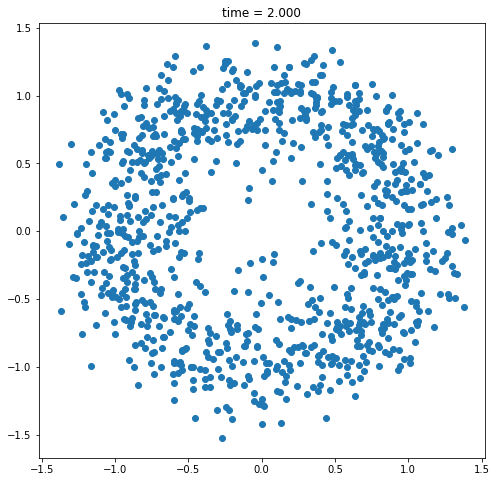

In [8]:
X0 = tf.random.uniform(minval=-1., maxval=1., shape=(1000, 2))
se.evolve(X0, h_mu, sigma=np.sqrt(2.), dt=0.01, n_steps=200, saveas='../data/2D/type2', animate_as='../data/2D/type2.mp4', idx2plt=[0, 1, 2])